Интернет-магазин "Стримчик" занимается продажей по всему миру компьютерных игр. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Цель исследования:
- выявить определяющие успешность игры закономерности; 
- составление портрета пользователя игр по регионам.

Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для исследования представлены данные до 2016 г.

Ход исследования:
- данные об играх я получу из файла /datasets/games.csv. О качестве данных ничего неизвестно, поэтому перед тем, как приступить к целям исследования, понадобится обзор данных.
Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработке данных, я исправлю все ошибки в данных, которые не приведут к искажению результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа.

Таким образом, мое исследование пройдет в шесть этапов:
1. Обзор данных
2. Предобработка данных
3. Проведение исследовательского анализа данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотезы
6. Написание общего вывода


## Обзор данных

### Чтение файла и изучение общей информации.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info() #получение общей информации о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


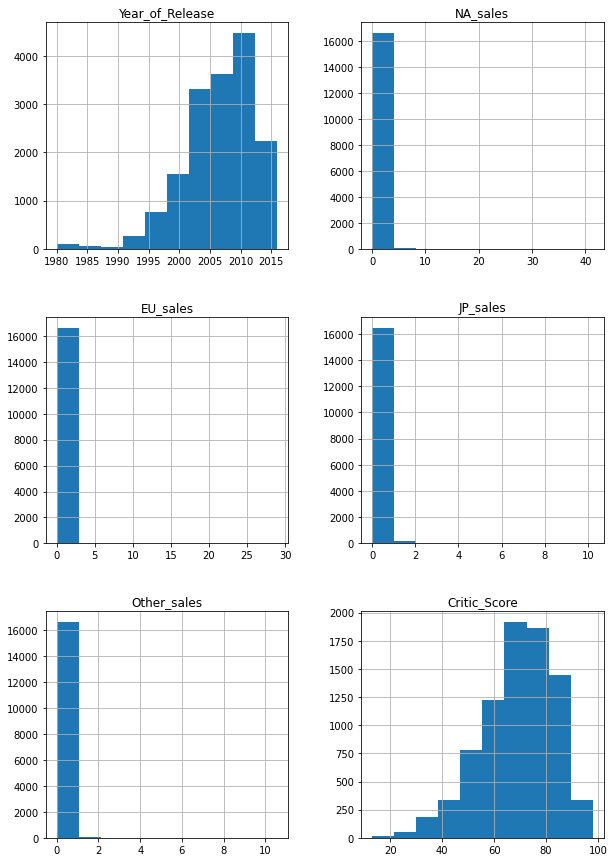

In [4]:
df.hist(figsize=(10,15)); #построение гистрограмм для числовых значений таблицы df

In [5]:
df.columns #выведение названия столбцов 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

При первичном ознакомлении с данными, мы увидели, что в таблицы присутствуют пропуски во многих столбцах, необходимо изменить тип данных в некоторых столбцах. Названия столбцов в таблицы отображается не с применением нижнего регистра.

## Предобработка данных 

### Изменение названия столбцов

In [6]:
#приводим названия столбцов к нижнему регистру
df = df.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

In [7]:
df.columns #вывод названий всех столбцов - проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Работа с пропусками

In [8]:
df.isna().sum() #количество пропущенных значений для каждого столбца

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm') #пропуски в процентном соотношении

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Мы обнаружили большое количество пропусок в таблице. Причины пропусков данных могут быть следующие:

1) Человеческий фактор (ошибке, намеренное не предоставление данных и т.д.) 2) Технологический сбой (при копировании, перенесении таблицы и т.д.) 3) Пропуск должен быть, так как показывает отсутствие какого-либо фактора.
Пропуски в колонках 'name', 'year_of_release' и 'genre' мы удалили, так как их обьем составляет менее 3% всей популяции.

In [10]:
#удаляем пропуски в столбцах name, year_of_release, genre
df = df.dropna(subset = ['name'])
df = df.dropna(subset = ['year_of_release'])
df = df.dropna(subset = ['genre'])

Пропуски в столбцах 'critic_score', 'user_score', 'rating' составляют более 40% от популяции и являются значимыми в проводимом исследования, поэтому удалять их нельзя, но и заменить их расчетной величиной мы не можем. 
Поэтому было принято решение, пропуски в столце 'rating' заменить на tbd (так как столбец с рейтингом имеет тип данных - object и эта замена на тип данных не повлияет), а пропуски в столбцах с оценками заменить на пустыне значения NaN.

In [11]:
#заменим пропуски в столбце на "tbd" - загулшка
df['rating'] = df['rating'].fillna('tbd')

In [12]:
df.isna().sum() #проверка

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

### Преобразование типа данных 

In [13]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
#заменяем tbd в столбце на пустые значения NaN для корректного отображения типа данных столбца

In [14]:
df['year_of_release'] = df['year_of_release'].astype(int) #изменяем тип данных на int
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Мы преобразовали тип данных там, где это требовалось и оставили пропуски в столбцах с оценками, так как это требовалось для совершения расчетов в будущих наших вычислениях. 

### Работа с дубликатами

In [15]:
df.duplicated().sum() #выявляем наличие дубликатов в таблице

0

In [16]:
df['genre'].unique() #провекра на неявные дубликаты в столбце 'genre'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [17]:
df['platform'].unique() #проверка на неявные дубликаты в столбце 'platform'

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

По результатам работы по поиску дубликатов в предоставленных данных - выявленных явных\неявных дубликатов - 0.

### Расчеты и добавление данных в таблицу 

In [18]:
#добавление колонки по суммарным продажам по регионам
df['total_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis='columns')

## Проведение исследовательского анализа данных 

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

### Анализ количества выпускаемых игр 

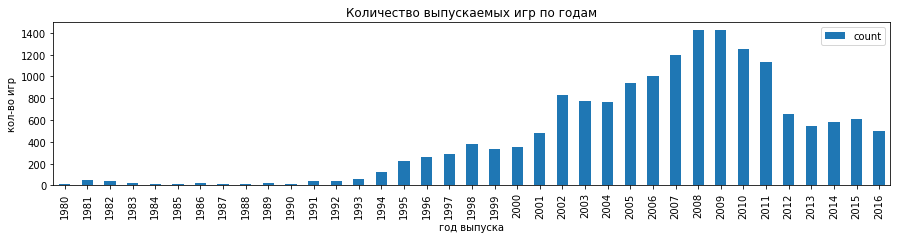

In [21]:
# количество выпускаемых игр по годам 
number_of_games=df.pivot_table(index='year_of_release', values='name',aggfunc='count')
number_of_games.columns=['count']
number_of_games.plot(title='Количество выпускаемых игр по годам', xlabel='год выпуска', ylabel='кол-во игр', y='count', figsize=(15,3), kind='bar')
plt.show()

По графику выше можно увидеть, что пик выпускаемых игр приходится на 2008-2009 года. До 2008 года наблюдался рост продаваемости игр, после 2009 года мы видим спад продаж. Данные до 1995 года предлагаем не рассматривать в виду незначительных показателей (возможно этап разработки и дизайна).

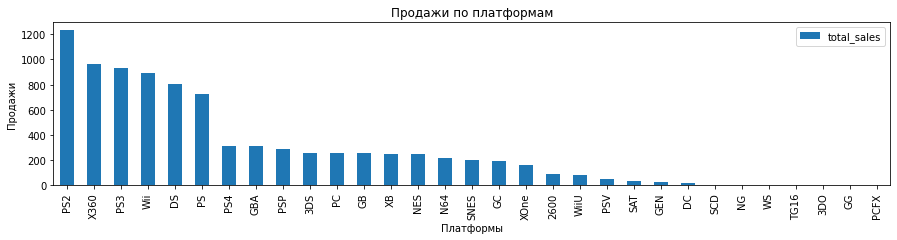

In [22]:
#строим сводную таблицу топ продаж по платформам
platform_pivot = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_pivot= platform_pivot.sort_values(by='total_sales', ascending=False);
platform_pivot.plot(title='Продажи по платформам', xlabel='Платформы', ylabel='Продажи', y='total_sales', figsize=(15,3), kind='bar')
plt.show()

### Определение топ-10 платформ

In [23]:
#создаем новый датафрейм по топ-10 платформам
df1=df.loc[(df['platform'].isin(['PS2','X360','PS3','Wii','DS','PS','PS4','GBA','PSP','3DS']))]

In [24]:
df1['total_sales'].sum() #проверка полноты новой популяции 

6722.04

In [25]:
#группируем данные по продажам по годам по топ-10 платформ
df2 = df1.groupby(['platform','year_of_release']).agg(total_sales=('total_sales','sum'))
df2

total_sales
platform year_of_release             
3DS      2011                   63.20
         2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
...                               ...
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

[97 rows x 1 columns]

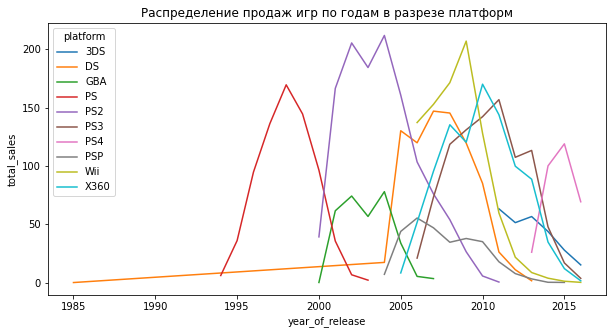

In [26]:
#постороение графика 
plt.figure(figsize=(10,5))
sns.lineplot(data=df2, x='year_of_release', y='total_sales', hue='platform');
plt.title('Распределение продаж игр по годам в разрезе платформ');

По линейному графику выше мы можем увидеть, что средний срок зрелости по жизненному циклу товара равен примерно 3-4 годам, поэтому мы в своих будущих исследовательских расчетах мы будем использовать период, начиная с 2012 года. Также за этот период ( с 2012 по 2015гг мы видим, как несколько платформ уже проходят стадию  спада жизненного цикла и одновременно с этим появляются новые платформы).

In [27]:
#создаем новый датафрейм с актуальным периодом
df_actual = df.loc[df['year_of_release'] > 2012]

In [28]:
#группируем данные по продажам по годам по топ-10 платформ
df_act_period = df_actual.groupby(['platform','year_of_release']).agg(total_sales=('total_sales','sum'))
df_act_period

total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

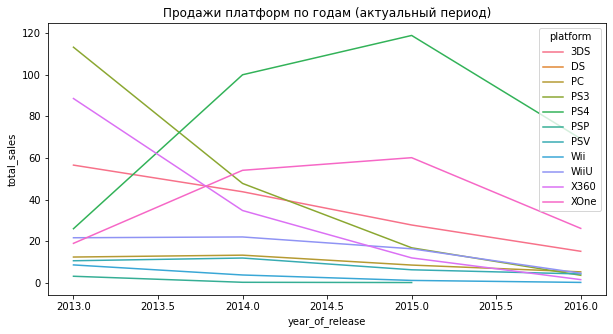

In [29]:
#постороение графика 
plt.figure(figsize=(10,5))
sns.lineplot(data=df_act_period, x='year_of_release', y='total_sales', hue='platform');
plt.title('Продажи платформ по годам (актуальный период)');

In [30]:
#df_act_period = df_actual.pivot_table(index=['year_of_release'], columns='platform', values='total_sales', aggfunc=['sum'])
#df_act_period

In [31]:
df_platforms_act = df_actual.groupby('platform', as_index=False).agg(sales=('total_sales', 'sum')).sort_values(by='sales', ascending=False)

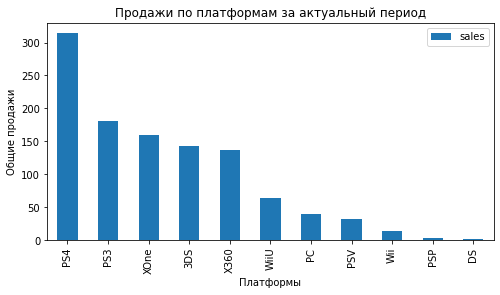

In [32]:
df_platforms_act.plot(x='platform', y='sales', kind='bar', figsize=(8,4))
plt.title('Продажи по платформам за актуальный период')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи');

По построенным графикам выше, можно увидеть, что за актуальный период лидирующую позицию занимает платформа - 'PS4'. Также, к потенциально прибыльным платформам мы бы отнесли платформу 'XOne'. Остальные платформы за актуальный период имеют нисходящий тренд, и, возможно находятся на стадии завершения жизненного цикла.

### Построение "ящика с усами" по платформам 

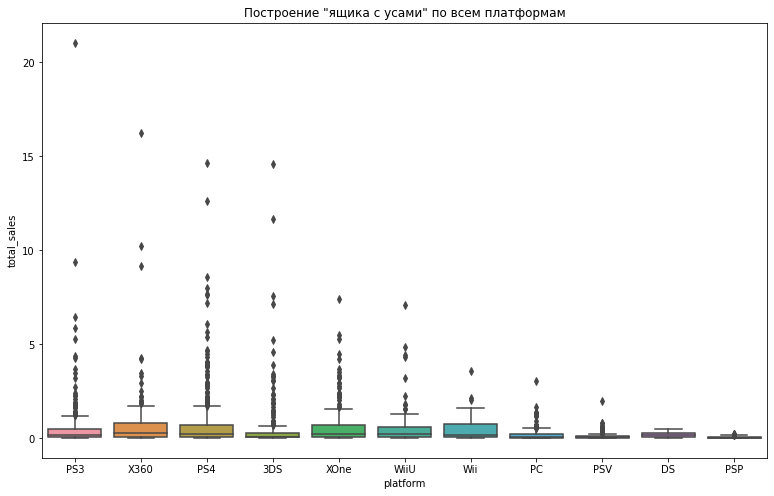

In [33]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df_actual,x='platform', y='total_sales');
plt.title('Построение "ящика с усами" по всем платформам');

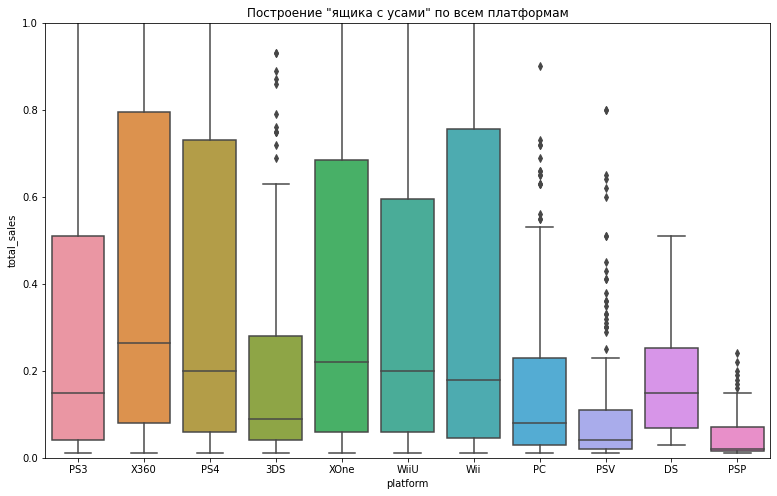

In [34]:
plt.figure(figsize=(13,8))
sns.boxplot(data=df_actual,x='platform', y='total_sales');
plt.title('Построение "ящика с усами" по всем платформам')
plt.ylim(0,1);

In [35]:
df_actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Самый максимальный уровень продаж мы видим у платформы PS3 - 21.05 млн.

Мы выделили платформы в 2 группы - популярные с большим количество продаж, и менее популярные, с продажами ниже 5 млн.
1 группа платформ: PC3, PC4, X360, XOne, WiiU, 3DS:
    средний уровень продаж колеблется от 470 тыс до 800 тыс. 
    самый высокий уровень продаж колеблется от 7 млн  до 21 млн 
    75% продаж составляют диапазон от 280 тыс до 730 тыс.
2 группа платформ: PC, PSV, DS, PSP, Wii:
    средний уровень продаж колеблется от 52 тыс до 593 тыс
    самый высокий уровень продаж колеблется от 200 тыс до 358 тыс
    75% продаж составляет диапазон от 70 тыс до 755 тыс

### Проанализируем как влияют на продажи отзывы критиков и пользователей на примере популярной платформы 'PS4'.

In [36]:
# создаем датафрейм с самой популярной платформой PS4 в актуальный период
df_ps4 = df_actual.loc[df_actual['platform'] == 'PS4']

In [37]:
df_ps4['total_sales'].sum() # проверка

314.14

In [38]:
# построение таблицы корреляции между оценками пользователей, критиков и продажами:
df_ps4[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Зависимость продаж от оценки критиков


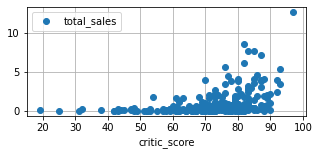

In [39]:
print('Зависимость продаж от оценки критиков')
df_ps4.plot(x='critic_score', y='total_sales', style = 'o', grid=True, figsize=(5,2));

Зависимость продаж от оценки пользователей


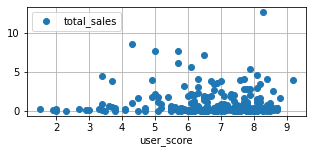

In [40]:
print('Зависимость продаж от оценки пользователей')
df_ps4.plot(x='user_score', y='total_sales', style='o', grid=True, figsize=(5,2));

По результатам построенной корреляции между оценками пользователей,  критиков и уровнем продаж, а также построенных диаграмм рассеивания, можно сделать следующие выводы:
- положительная зависимость наблюдается с оценками критиков (чем выше оценка - тем выше продажи);
- отрицательная зависимость наблюдается с оценками пользователей (чем выше оценка - тем ниже продажи). 

Платформа: PS3
              user_score  critic_score  total_sales
user_score      1.000000      0.599920     0.002394
critic_score    0.599920      1.000000     0.334285
total_sales     0.002394      0.334285     1.000000
Платформа: X360
              user_score  critic_score  total_sales
user_score      1.000000      0.520946    -0.011742
critic_score    0.520946      1.000000     0.350345
total_sales    -0.011742      0.350345     1.000000
Платформа: 3DS
              user_score  critic_score  total_sales
user_score      1.000000      0.769536     0.241504
critic_score    0.769536      1.000000     0.357057
total_sales     0.241504      0.357057     1.000000


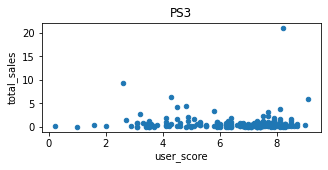

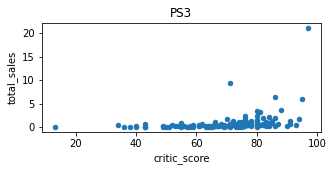

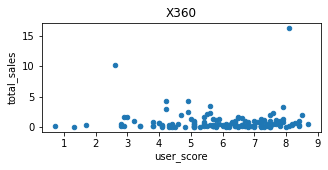

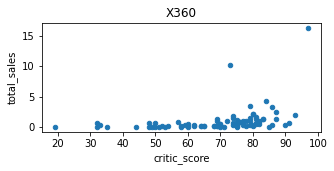

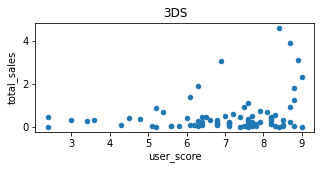

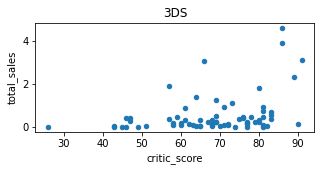

In [41]:
platforms = df_actual[df_actual['platform'] != 'PS4'].sort_values(by='total_sales', ascending=False).head(5) #выводим топ-5 платформ, после PC4
top_5 = df_actual.query('platform in @platforms.platform') 

list = top_5['platform'].unique() #лист топ-5 платформ

for pl in list:
    top_5.query('platform == @pl').plot(
    x='user_score', y='total_sales', kind='scatter', figsize=(5,2), title=pl)
    top_5.query('platform == @pl').plot(
    x='critic_score', y='total_sales', kind='scatter', figsize=(5,2), title=pl)
    print('Платформа:', pl)
    #print('Корреляция между продажами, оценкой пользователей и оценкой критиков', top_5[['user_score','critic_score','total_sales']].corr());
    print(top_5.query('platform == @pl')[['user_score','critic_score','total_sales']].corr())

In [86]:
df_actual.query('platform in @platforms.platform').platform.unique(), platforms.platform.unique()

(array(['PS3', 'X360', '3DS'], dtype=object),
 array(['PS3', 'X360', '3DS'], dtype=object))

По результатам проведенного анализа зависимости между оценками пользователей,  критиков и уровнем продаж - можно сделать следующие выводы:
PS3:
- положительная зависимость наблюдается с оценками критиков (чем выше оценка - тем выше продажи);
- практически нулевая (отсуствует) зависимость с оценкой пользователей. 
X360:
- положительная, но слабая зависимость с оценками пользователей.
- слабая отрицательная зависимость с оценками критиков (чем выше оценка - тем ниже продажи)
3DS:
- обе слабоположительные зависимости с оценками пользователей и оценками критиков.

Стоит заметить, что у всех платформ наблюдается положительная корреляция с оценкой критиков, а вот с оценкой пользователей у всех своя история..  

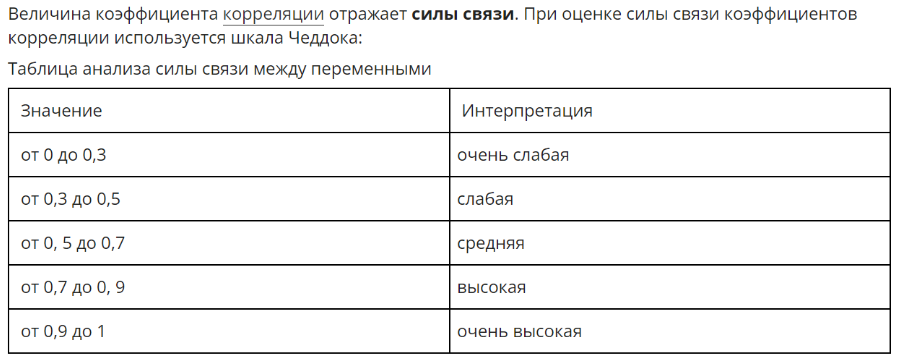

### Анализ жанров игр

,total_sales
genre,
Action,0.110
Adventure,0.030
Fighting,0.125
Misc,0.100
Platform,0.225
Puzzle,0.060
Racing,0.120
Role-Playing,0.125
Shooter,0.450


Зависимость уровня продаж от жанра игры


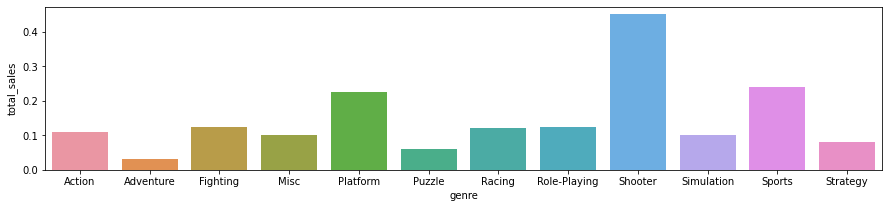

In [42]:
genre=df_actual.pivot_table(index='genre', values='total_sales', aggfunc='median')
display(genre)
plt.figure(figsize=(15,3))
print('Зависимость уровня продаж от жанра игры')
sns.barplot(x=genre.index, y=genre['total_sales']);

In [43]:
df_actual.groupby('genre')['name'].count()

genre
Action          766
Adventure       245
Fighting         80
Misc            155
Platform         74
Puzzle           17
Racing           85
Role-Playing    292
Shooter         187
Simulation       62
Sports          214
Strategy         56
Name: name, dtype: int64

Самым популярным и самым продаваемым жанром является жанр - 'Shooter'. Самым не востребованным жанром является - 'Adventure','Pazzle'. Мы сгруппировали данные по количеству игр, входящих в каждый жанр и увидели, что не смотря на то, что количество игр у жанра "Adventure" практически на 40% превышает количество игр в жанре "Shooter" - уровень продаж они имеют ровно противоположный. 

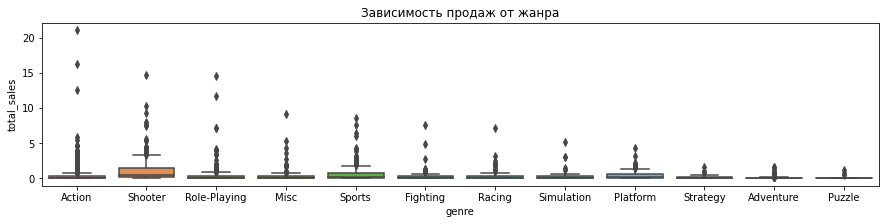

In [44]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df_actual, x='genre', y='total_sales')
plt.title('Зависимость продаж от жанра');

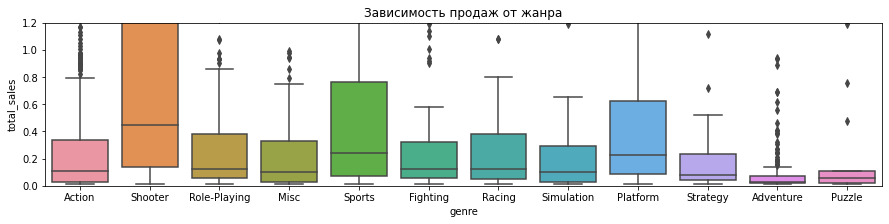

In [45]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df_actual, x='genre', y='total_sales')
plt.title('Зависимость продаж от жанра')
plt.ylim(0,1.2);

In [46]:
df_actual.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


Самый длинный ряд успешно продающихся игр имеют жанры: Shooter (с большим отрывом), Sports, Platform. Однако жанр Sports имеет большой разброс данных, что может говорить о нестабильности показателя медианы.
Самый высокий показетль средних продаж - у жанра Shooter, 1 млн 246 тыс. 
Самвый высокий уровень медианы - у жанра Shooter (450 тыс), однако большой разброс данных может говорить о нестабильности медианы. 

## Составление портрета пользователя по регионам.

### Портрет пользователя по региона по платформам 

In [47]:
#строим сводную таблицу топ продаж по платформам по регионам
platform_region = df_actual.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
platform_region= platform_region.sort_values(by='na_sales', ascending=False);
platform_region

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
PS3,67.81,23.35,63.50
3DS,30.96,67.81,38.20
WiiU,19.85,10.88,29.21
PC,25.36,0.00,11.11
Wii,5.93,0.05,6.56
PSV,6.10,18.59,5.04


In [48]:
#строим сводную таблицу топ жанров по платформам по регионам
genre_region = df_actual.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
genre_region= genre_region.sort_values(by='na_sales', ascending=False);
genre_region

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Shooter,87.86,6.61,109.74
Sports,60.52,5.41,65.27
Role-Playing,36.97,51.04,46.40
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Fighting,8.55,7.65,15.55
Racing,20.19,2.30,12.96
Adventure,8.25,5.82,7.14


In [49]:
# создаем сводную таблицу по рейтингу платформ с Северной Америке
df_na = df_actual.pivot_table(
    index = 'platform',
    values = 'na_sales',
    aggfunc = 'sum').sort_values('na_sales', ascending= False).head()

In [50]:
df_na_all = df_actual.pivot_table(
    index = 'platform',
    values = 'na_sales',
    aggfunc = 'sum').sort_values('na_sales', ascending= False)

In [51]:
#создаем группу 'other' - по платформам, не вошедших в топ-5
df_na.loc['other'] = df_na_all.iloc[5:].sum()[0]

In [52]:
# строим круговую диаграмму топ-5 платформ в NA
#df_na.plot(kind='pie', y='na_sales', legend=False, figsize=(12,5), autopct='%.0f%%')
#plt.title('5 самых популярных платформ в Северной Америке');

In [53]:
# создаем сводную таблицу по рейтингу платформ с Европе
df_eu = df_actual.pivot_table(
    index = 'platform',
    values = 'eu_sales',
    aggfunc = 'sum').sort_values('eu_sales', ascending= False).head()

In [54]:
df_eu_all = df_actual.pivot_table(
    index = 'platform',
    values = 'eu_sales',
    aggfunc = 'sum').sort_values('eu_sales', ascending= False)

In [55]:
#создаем группу 'other' - по платформам, не вошедших в топ-5
df_eu.loc['other'] = df_eu_all.iloc[5:].sum()[0]

In [56]:
# строим круговую диаграмму топ-5 платформ в EU
#df_eu.plot(kind='pie', y='eu_sales', legend=False, figsize=(12,5), autopct='%.0f%%')
#plt.title('5 самых популярных платформ в Европе');

In [57]:
# создаем сводную таблицу по рейтингу платформ с Японии
df_jp = df_actual.pivot_table(
    index = 'platform',
    values = 'jp_sales',
    aggfunc = 'sum').sort_values('jp_sales', ascending= False).head()

In [58]:
df_jp_all = df_actual.pivot_table(
    index = 'platform',
    values = 'jp_sales',
    aggfunc = 'sum').sort_values('jp_sales', ascending= False)

In [59]:
#создаем группу 'other' - по платформам, не вошедших в топ-5
df_jp.loc['other'] = df_jp_all.iloc[5:].sum()[0]

In [60]:
# строим круговую диаграмму топ-5 платформ в JP
#df_jp.plot(kind='pie', y='jp_sales', legend=False, figsize=(12,5), autopct='%.0f%%')
#plt.title('5 самых популярных платформ в Японии');

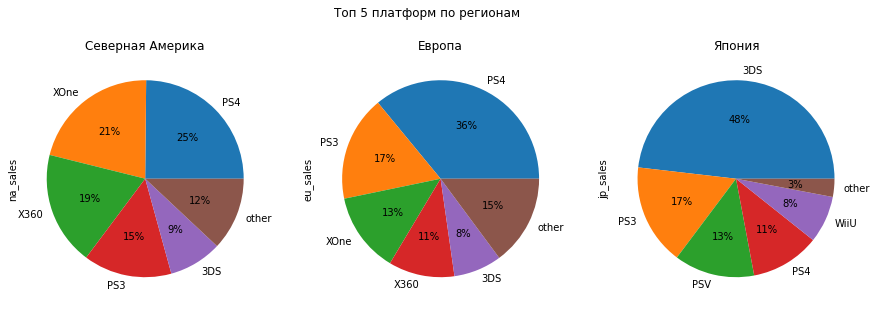

In [61]:
fig = plt.figure()
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1 = df_na.plot(kind='pie',y='na_sales',figsize=(15,5), legend=False, autopct='%.0f%%', ax =ax1)
ax1.set_title('Северная Америка')

ax2 = df_eu.plot(kind='pie',y='eu_sales',figsize=(15,5), legend=False, autopct='%.0f%%', ax=ax2)
ax2.set_title('Европа')

ax3 = df_jp.plot(kind='pie',y='jp_sales',figsize=(15,5), legend=False, autopct='%.0f%%', ax=ax3)
ax3.set_title('Япония')

fig.suptitle('Топ 5 платформ по регионам');

По построенным графикам мы видим, что у Севернйо Америке и Европы топ-5 платформ совпадают, только отличаются своей позицией в топе. В то время как в Японии первое место занимает платформа 3DS, которая у Северной Америке и Европы стоит на 5 месте. А самая популярная платформа в Северной Америке и Европе - PS4, стоит у Японии на 4 месте, что говорит о противоположных предпочтениях в странах. Также бросается в глаза % прочих платформ, который очень низкий по сравнению  с аналогичными показателями в Северной Америке и Европе. 

### Портрет пользователя по регионам по жанрам 

In [62]:
# создаем сводную таблицу по рейтингу платформ с Северной Америке
na_genre = df_actual.pivot_table(
    index = 'genre',
    values = 'na_sales',
    aggfunc = 'sum').sort_values('na_sales', ascending= False).head()

In [63]:
na_genre_all = df_actual.pivot_table(
    index = 'genre',
    values = 'na_sales',
    aggfunc = 'sum').sort_values('na_sales', ascending= False)

In [64]:
#создаем группу 'other' - по платформам, не вошедших в топ-5
na_genre.loc['other'] = na_genre_all.iloc[5:].sum()[0]

In [65]:
# строим круговую диаграмму топ-5 платформ в NA
#na_genre.plot(kind='pie', y='na_sales', legend=False, figsize=(12,5), autopct='%.0f%%')
#plt.title('5 самых популярных жанров в Северной Америке');

In [66]:
# создаем сводную таблицу по рейтингу платформ с Европе
eu_genre = df_actual.pivot_table(
    index = 'genre',
    values = 'eu_sales',
    aggfunc = 'sum').sort_values('eu_sales', ascending= False).head()

In [67]:
eu_genre_all = df_actual.pivot_table(
    index = 'genre',
    values = 'eu_sales',
    aggfunc = 'sum').sort_values('eu_sales', ascending= False)

In [68]:
#создаем группу 'other' - по платформам, не вошедших в топ-5
eu_genre.loc['other'] = eu_genre_all.iloc[5:].sum()[0]

In [69]:
# строим круговую диаграмму топ-5 платформ в EU
#eu_genre.plot(kind='pie', y='eu_sales', legend=False, figsize=(12,5), autopct='%.0f%%')
#plt.title('5 самых популярных жанров в Европе');

In [70]:
# создаем сводную таблицу по рейтингу платформ с Японии
jp_genre = df_actual.pivot_table(
    index = 'genre',
    values = 'jp_sales',
    aggfunc = 'sum').sort_values('jp_sales', ascending= False).head()

In [71]:
jp_genre_all = df_actual.pivot_table(
    index = 'genre',
    values = 'jp_sales',
    aggfunc = 'sum').sort_values('jp_sales', ascending= False)

In [72]:
#создаем группу 'other' - по платформам, не вошедших в топ-5
jp_genre.loc['other'] = jp_genre_all.iloc[5:].sum()[0]

In [73]:
# строим круговую диаграмму топ-5 платформ в JP
#jp_genre.plot(kind='pie', y='jp_sales', legend=False, figsize=(12,5), autopct='%.0f%%')
#plt.title('5 самых популярных жанров в Японии');

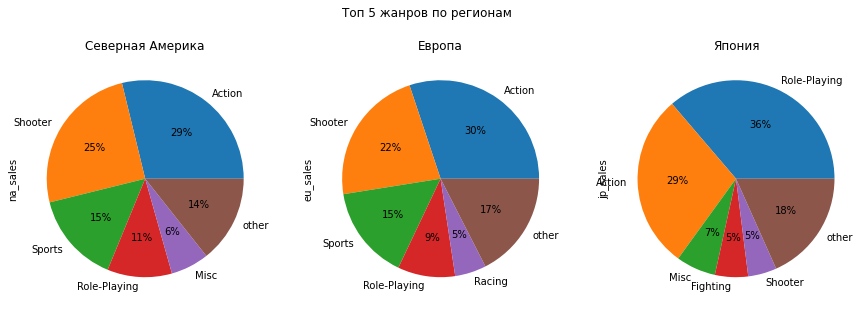

In [74]:
fig = plt.figure()
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1 = na_genre.plot(kind='pie',y='na_sales',figsize=(15,5), legend=False, autopct='%.0f%%', ax =ax1)
ax1.set_title('Северная Америка')

ax2 = eu_genre.plot(kind='pie',y='eu_sales',figsize=(15,5), legend=False, autopct='%.0f%%', ax=ax2)
ax2.set_title('Европа')

ax3 = jp_genre.plot(kind='pie',y='jp_sales',figsize=(15,5), legend=False, autopct='%.0f%%', ax=ax3)
ax3.set_title('Япония')

fig.suptitle('Топ 5 жанров по регионам');

По построенным графикам по Топ-5 жанров по регионам, можно сделать вывод, что самые популярные жанры идентичны у Северной Америке и Европы. А вот у Японии они отличаются противоположно. Жанр Role-Playing, который стоит на 1 месте в Японии - в Северной Америке и Европе занимает только 4 место. А вот жанр  Action популярен везде и занимает лидирующие 1-2 места в странах.

### Сравнение рейтингов по регионам

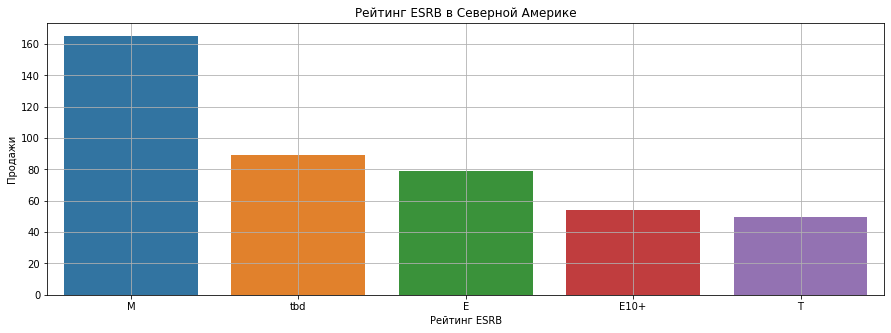

In [75]:
#построение графика рейтингов по региону Северная Америка
na_rating = df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x=na_rating.index, y=na_rating['na_sales'])
plt.title('Рейтинг ESRB в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.grid(True);

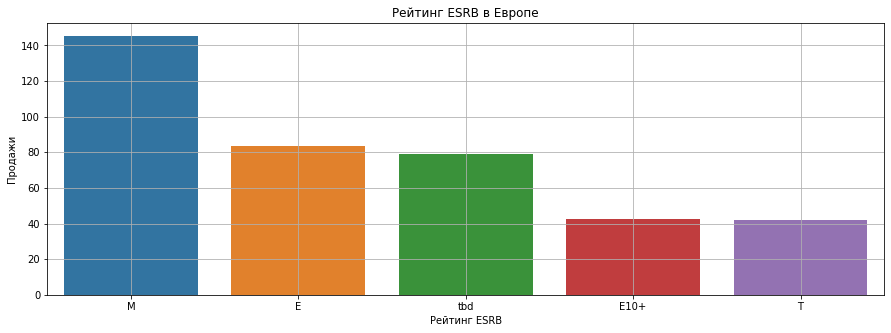

In [76]:
#построение графика рейтингов по региону Европа
eu_rating = df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x=eu_rating.index, y=eu_rating['eu_sales'])
plt.title('Рейтинг ESRB в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.grid(True);

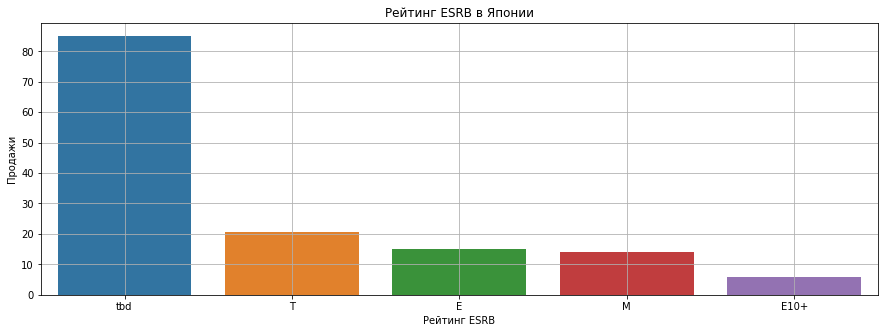

In [77]:
#построение графика рейтингов по региону Япония
jp_rating = df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x=jp_rating.index, y=jp_rating['jp_sales'])
plt.title('Рейтинг ESRB в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи')
plt.grid(True);

В Северной Америкеи и Европе рейтинг влияет на продажи. Так, в указанных странах, самые большие продажи наблюдаются у игр с рейтингом - М  - для детей от 17 лет. Вторым по популярности следуют игры с рейтингом Е - для всех возрастов. а вот игры с детскими рейтингами - замыкают 5 лидеров.  
В Японии ситуация совершенно другая и судя по графику - тут рейтинг не особо влияет на уровень продаж игр, о чем нам говорит лидирующая позиция с рейтингом - to be determined....  

## Проверка гипотиз

### Гипотиза №1. Средние пользовательские рейтинги платформ XOne и PC одинаковые.

H_0: Средние пользовательские рейтинги XOne и PC одинаковые.
H_1: Средние пользовательские рейтинги XOne и PC отличаются.
alpha = 0.01

In [78]:
from scipy import stats as st
import numpy as np
sample_1 = df_actual[(df_actual['platform'] == 'XOne') & (~df_actual['user_score'].isna())]['user_score']
sample_2 = df_actual[(df_actual['platform'] == 'PC') & (~df_actual['user_score'].isna())]['user_score']

alpha = 0.01
results = st.ttest_ind(sample_1, sample_2)
print('p-значение:', results.pvalue)
print('platform XOne user score mean:', sample_1.mean())
print('platform PC user score mean:', sample_2.mean())

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотизу')

p-значение: 0.14012658403611647
platform XOne user score mean: 6.521428571428572
platform PC user score mean: 6.2696774193548395
Не получилось отвергнуть нулевую гипотизу


</font><font color='Black'><b> В ходе проведения тестирования, гипотиза H_0: Средние пользовательские рейтинги XOne и PC одинаковые - подтвердилась. Значит пользователи одинаково предпочитают игры этих двух платформ. </b></font><br>

### Гипотиза №2. Средние пользовательские рейтинги жанров Action  и Sports  одинаковые.

H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
H_1: Средние пользовательские рейтинги жанров Action и Sports отличаются.`
alpha = 0.01

In [79]:
sample_1 = df_actual.loc[(df_actual['genre'] == 'Action') & (~df_actual['user_score'].isna())]['user_score']
sample_2 = df_actual.loc[(df_actual['genre'] == 'Sports') & (~df_actual['user_score'].isna())]['user_score']

alpha = 0.01
results = st.ttest_ind(sample_1, sample_2)
print('p-значение:', results.pvalue)
print('genre Action mean:', sample_1.mean())
print('genre Sports mean:', sample_2.mean())

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотизу')
else:
    print('Не получилось отвергнуть нулевую гипотизу')

p-значение: 1.0517832389140023e-27
genre Action mean: 6.837532133676092
genre Sports mean: 5.238124999999999
Отвергаем нулевую гипотизу


</font><font color='Black'><b>В ходе проведения тестирования гипотиза H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые - не подтвердилась. И из круговых диаграмм выше, мы видели, что жанр Action более популярен, нежели Sports.
</b></font><br>

Нулевая гипотиза -  когда действия\события\выборки совпадают. Альтернативная - когда они отличаются. 
Выбор значения alpha зависит от обьема выборки.
Стандартные значения Alpha: 0,1; 0,05; 0,01; 0,001.
Чем она больше - тем меньше должен быть показатель alpha.

</font><font color='Black'><b>Для тестов проверки гипотиз был использован t-критерий стьюдента. Критерий Стьюдента предназначен для сравнения двух генеральных совокупностей. 
Мы использовали тест scipy.stats.ttest_ind для проверки гипотезы о равенстве среднего двух генеральных совокупностей.
</b></font><br>

## Общий вывод

Мы получили, обработали и проанализировали данные по компьютерным играм в нескольких регионах (Северная Америка, Европа, Япония и другие страны).
В процессе знакомства с данными, мы обнаружили проблемные места (пропуски в столбцах, некорректные названия столбцов) и на этапе предобработке данных - исправили все выявленные погрешности.
Также, мы добавили столбец с общей суммой продаж по всем регионам, для удобства применения его в будущих наших расчетах.
На этапе исследовательского анализа данных,  мы проанализировали следующие аспекты:
    - количество выпускаемых игр по годам и выявление зависимости;
    - топ-10 популярных платформ;
    - взаимосвязи между оценками критиков и пользвателей и продажами;
    - Анализ жанров игр
Также, мы составили портрет пользователя игр по 3 регионам и выяснили, что в регионах: Северная Америка и Европа, предпочтения у потенциального пользователя практически идентичны, в то время как в Японии - предпочтения пользователя по жанру и платформе игр сильно отличются от предыдущих двух регионов
Также, мы проанализировали зависимость от рейтинга ESRB и уровня продаж и выяснили, что этот рейтинг влияет только на продажи в Северной Америке и Европе, а вот на продажи в Японии он никакого влияния не оказывает.

Кроме этого, мы проверили работу двух гипотиз: 
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтвердилось;
    - Средние пользовательские рейтинги жанров Action и Sports одинаковые - не подтвердилось.
    

</font><font color='Black'><b>Подводя итог нашему исследованию, хотим акцентировать внимание на самых популярных платформах, на которые стоит обратить внимание для планирования бюджета на 2017 год: PC4 и XOne в жанре Action и Shooter с применением рейтингов ESRB для регионов Северная Америка и Европа (также продажи на этих платформах зависимы от оценки критиков), и платформу 3DS в жанре Role-Playing без взятия во внимение рейтингов ESRB - для Японии.</b></font><br>